In [1]:
import sys
import os
import pandas as pd
from os import path

import pickle
from IPython.core.display import display, HTML, Markdown

sys.path.append(os.path.abspath("../../ml/"))

from apply_loocv_and_save import *
from dev_wtp_io_utils import *
import gc
import nibabel as nib

nonbids_data_path = "/gpfs/projects/sanlab/shared/DEV/nonbids_data/"
ml_data_folderpath = "/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml"
train_test_markers_filepath = ml_data_folderpath + "/train_test_markers_20210601T183243.csv"
test_train_df = pd.read_csv(train_test_markers_filepath)

all_sst_events= pd.read_csv(ml_data_folderpath +"/SST/" + "all_sst_events.csv")


dataset_name = 'posterror_conditions'

from nilearn.decoding import DecoderRegressor, Decoder

script_path = '/gpfs/projects/sanlab/shared/DEV/DEV_scripts/fMRI/ml'
# HRF 2s

#get a PFC mask
#pfc_mask = create_mask_from_images(get_pfc_image_filepaths(ml_data_folderpath + "/"),threshold=10)
#get the masks we want




python initialized for apply_loocv_and_save


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/datasets/__init__.py:87: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


4


In [2]:
background_img = nlt.Brain_Data('/projects/sanlab/shared/spm12/canonical/MNI152_T1_1mm_brain.nii').to_nifti()

neurosynth_emo_reg_mask = nlt.Brain_Data(ml_data_folderpath + '/masks/emotion regulation_association-test_z_FDR_0.01.nii.gz').threshold(binarize=True).to_nifti()
neurosynth_error_mask = nlt.Brain_Data(ml_data_folderpath + '/masks/error_association-test_z_FDR_0.01.nii.gz').threshold(binarize=True).to_nifti()
accmask = nlt.Brain_Data(ml_data_folderpath + '/masks/harvardoxford-cortical_prob_Cingulate Gyrus, anterior division.nii.gz').threshold(binarize=True,upper=25).to_nifti()

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/image/resampling.py:527: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


In [3]:
from analyze_results import plot_stat_maps, get_bd, visualize_corr, get_ind_div_for_pes_combined, remove_selected_outliers, create_histogram

In [4]:
def run_full_pes_analysis(mask_label,mask_file,similarity_method,include_gender_breakdown=False):
    dataset_mask_label = mask_label
    relevant_mask = mask_file
    results_filepath=ml_data_folderpath + "/SST/train_test_results_" + dataset_name + "_84subs_twoclasses_" + dataset_mask_label +".pkl"
    brain_data_filepath = ml_data_folderpath + '/SST/Brain_Data_posterror_conditions_84subs_correct_cond.pkl'

    plotting.plot_img(
        relevant_mask,
        threshold='auto',
        cmap='autumn',
        bg_img=background_img)


    print(results_filepath)
    results=pickle.load(open(results_filepath,'rb'))

    print(np.mean(results[0]))

    PostCorrect_ns=results[3]['CorrectGoFollowingCorrectStop']
    #display(Markdown("### CorrectGoFollowingCorrectStop"))
    plotting.plot_img(PostCorrect_ns,threshold='auto',bg_img=background_img)

    PostError_ns=results[3]['CorrectGoFollowingFailedStop']
    #display(Markdown("### CorrectGoFollowingFailedStop"))
    plotting.plot_img(PostError_ns,threshold='auto',bg_img=background_img)

    print(results_filepath,flush=True)

    print("plotting signatures")

    plot_stat_maps(PostError_ns,PostCorrect_ns)

    print("loading data")

    bd=get_bd(brain_data_filepath,PostError_ns,PostCorrect_ns,relevant_mask,similarity_method=similarity_method)

    create_histogram(bd)

    ind_div_combined = get_ind_div_for_pes_combined(bd,ml_data_folderpath)

    ind_div_combined = remove_selected_outliers(ind_div_combined,show_plot=False)

    for neural_var in ['PE_trials_PostError_similarity','PC_trials_PostCorrect_similarity']:
        display(Markdown("### " + neural_var))
        for correlate in ['RTFS_f1_minus_f2','RTFS_factor_1','RTFS_factor_2','SST_SSRT','pes_mean_limited','PostErrorSlowW1','cancer_promoting_minus_preventing_FFQ',
            'cancer_promoting_FFQ','cancer_preventing_FFQ']:
            visualize_corr(neural_var,correlate,ind_div_combined)
            
    if include_gender_breakdown:
        for bs_f in ['Male','Female']:
            display(Markdown("### " + bs_f))
            for neural_var in ['PE_trials_PostError_similarity','PC_trials_PostCorrect_similarity']:
                display(Markdown("#### " + neural_var))
                for correlate in ['RTFS_f1_minus_f2','RTFS_factor_1','RTFS_factor_2','SST_SSRT','pes_mean_limited','PostErrorSlowW1','cancer_promoting_minus_preventing_FFQ',
            'cancer_promoting_FFQ','cancer_preventing_FFQ']:
                    visualize_corr(neural_var,correlate,ind_div_combined.loc[ind_div_combined.birthsex_factor==bs_f,:])




/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/train_test_results_posterror_conditions_84subs_twoclasses_wholebrain.pkl
0.8888888888888888
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/train_test_results_posterror_conditions_84subs_twoclasses_wholebrain.pkl
plotting signatures


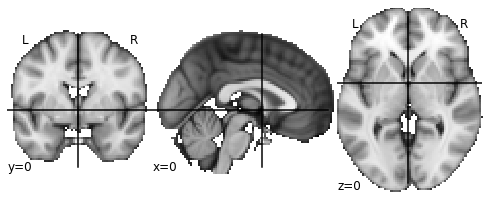

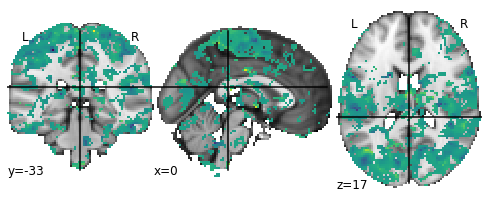

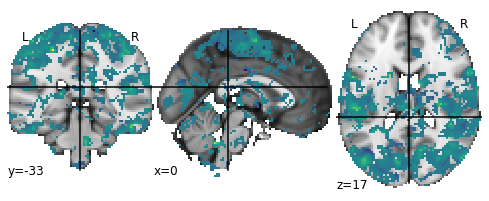

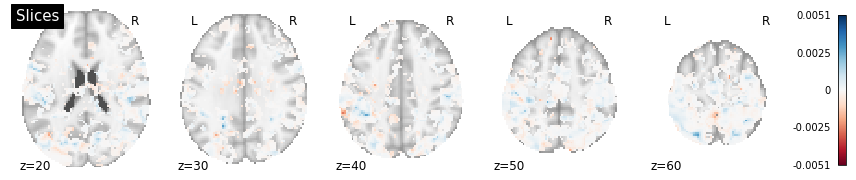

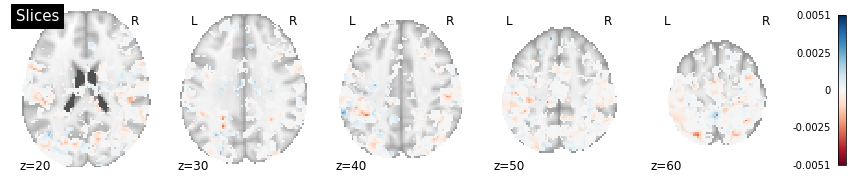

loading data
applying mask
getting similarity 1
getting similarity 2
creating histograms


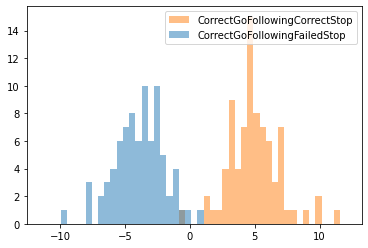

,PostError_similarity,PostCorrect_similarity
condition_label,,
CorrectGoFollowingCorrectStop,4.969145,-4.969145
CorrectGoFollowingFailedStop,-4.627246,4.627246


0.009232456815562565 0.07499674494725306 -0.0657642881316905 0.08422920176281562


0.04934769830378225 0.16000871055522017 -0.11066101225143793 0.20935640885900242


1200.7835177866666 4461.633046351562 -3260.849528564896 5662.416564138229


4.872617978045989 5.159237045882512 -0.286619067836523 10.0318550239285


-3.8214337347524667 5.6639886574443405 -9.485422392196806 1.8425549226918738


-4.872617978045989 5.159237045882512 -10.0318550239285 0.286619067836523


3.8214337347524667 5.6639886574443405 -1.8425549226918738 9.485422392196806


### PE_trials_PostError_similarity

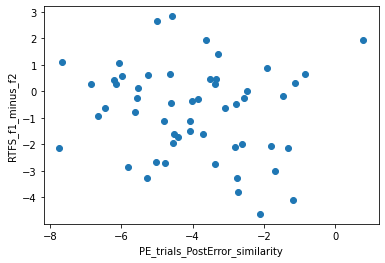

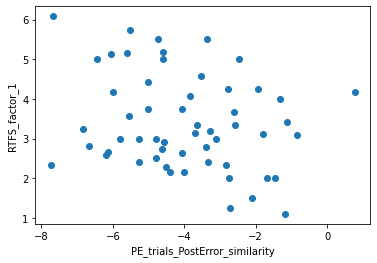

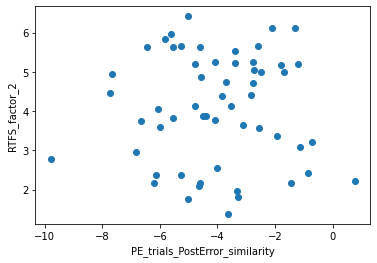

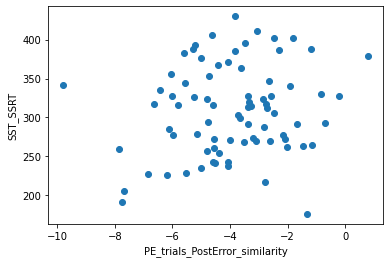

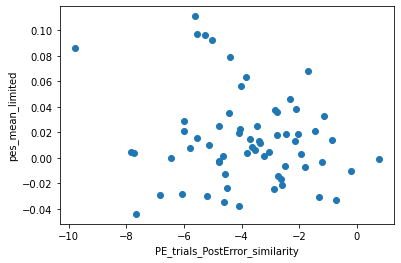

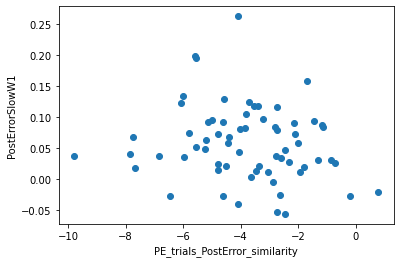

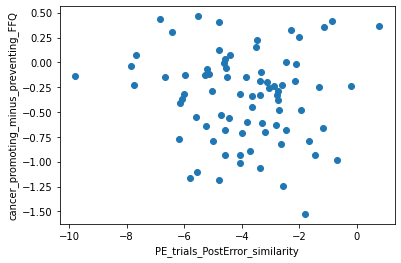

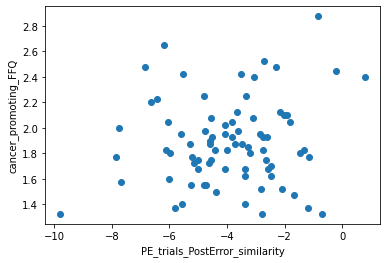

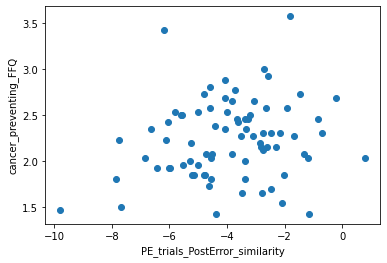

### PC_trials_PostCorrect_similarity

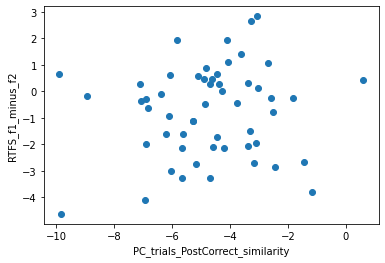

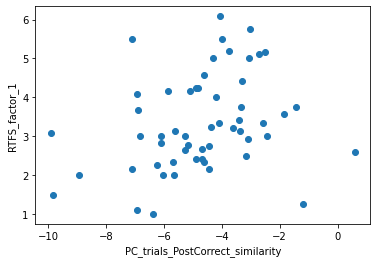

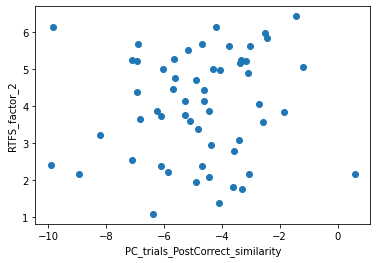

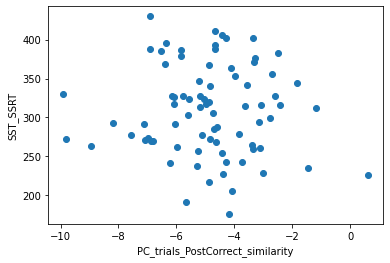

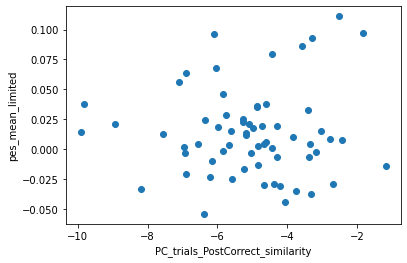

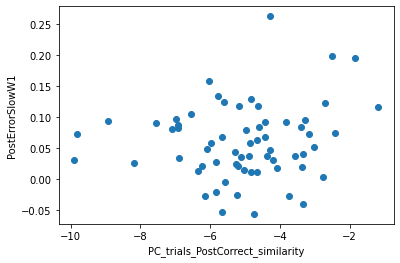

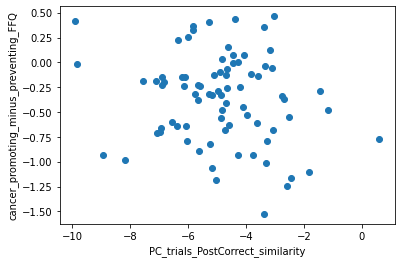

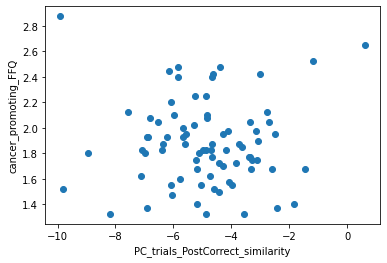

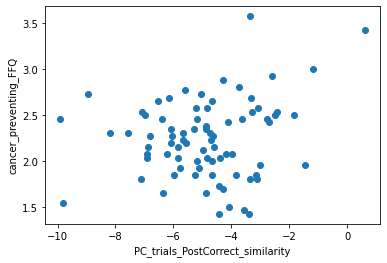

### Male

#### PE_trials_PostError_similarity

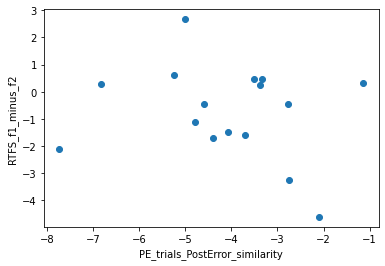

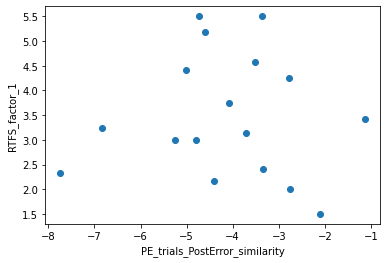

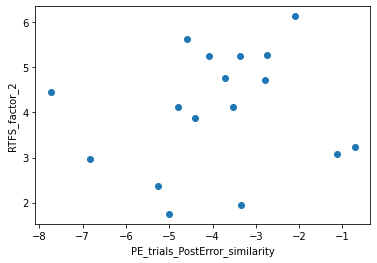

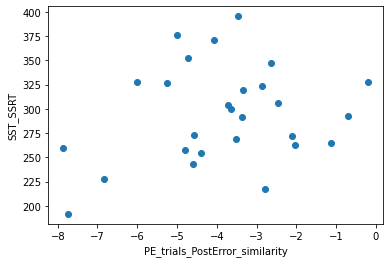

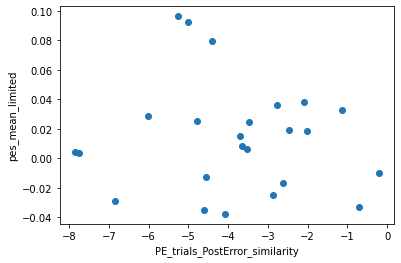

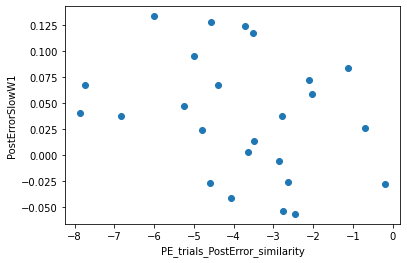

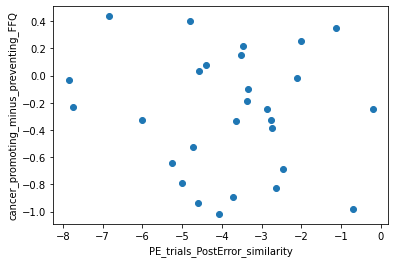

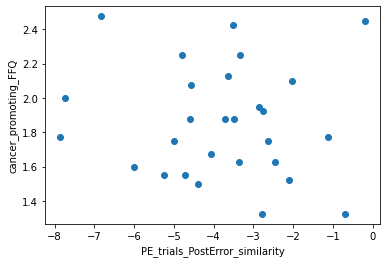

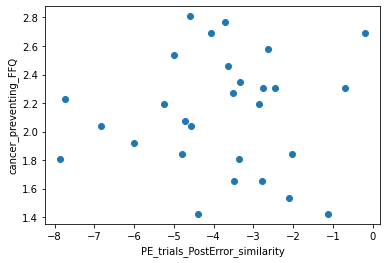

#### PC_trials_PostCorrect_similarity

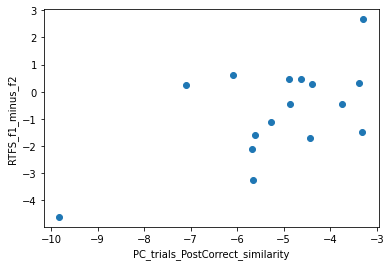

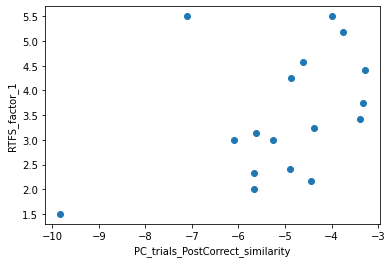

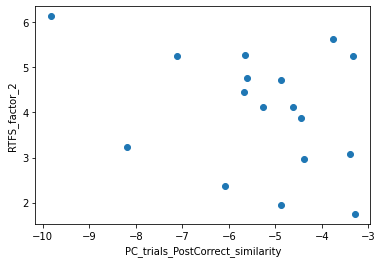

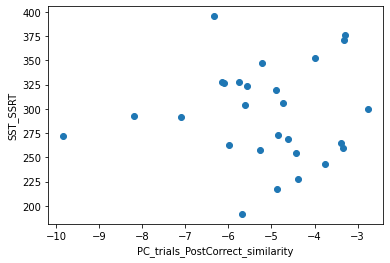

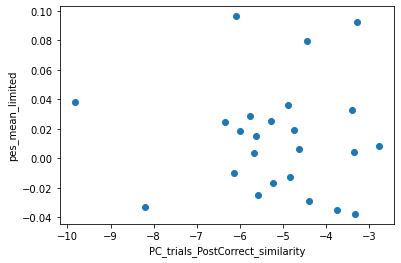

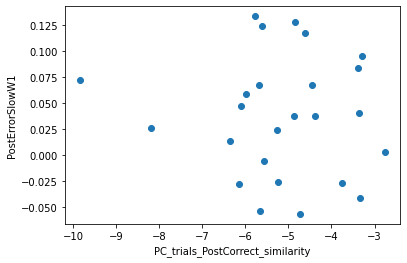

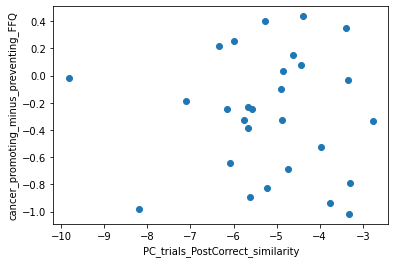

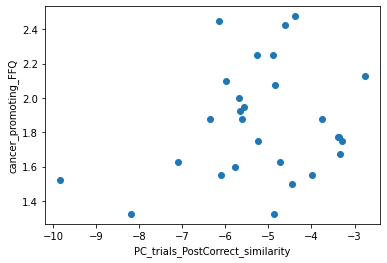

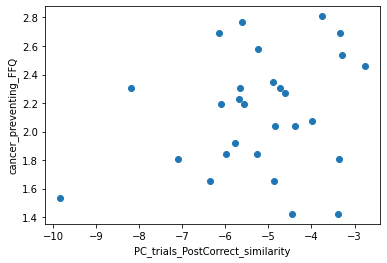

### Female

#### PE_trials_PostError_similarity

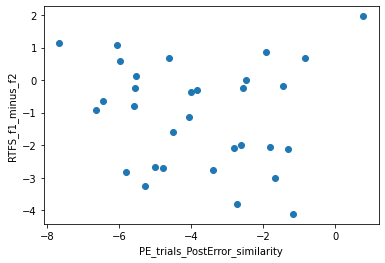

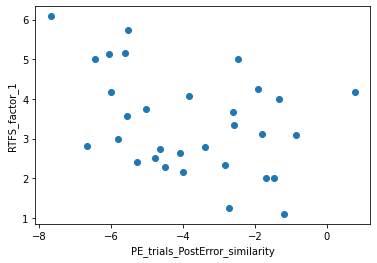

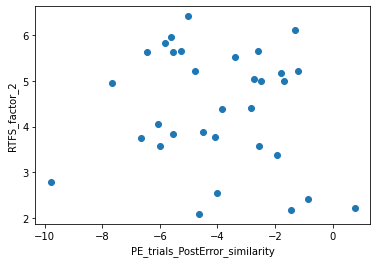

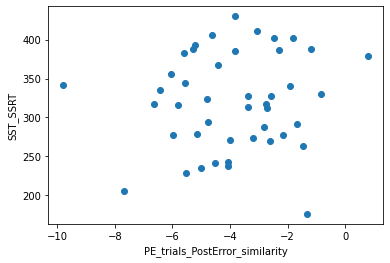

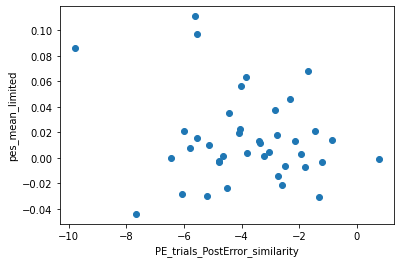

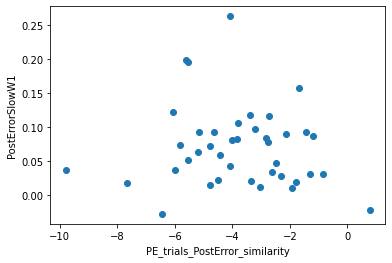

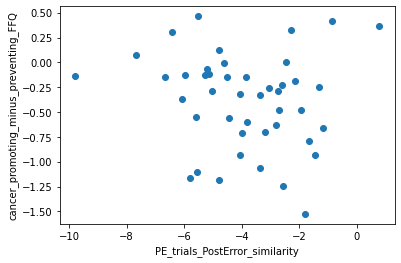

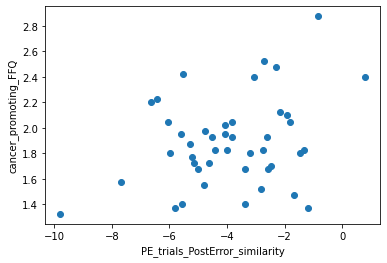

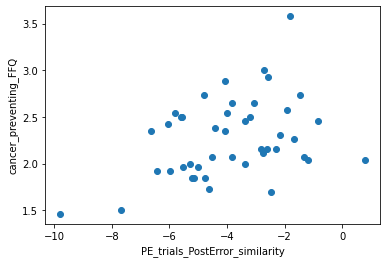

#### PC_trials_PostCorrect_similarity

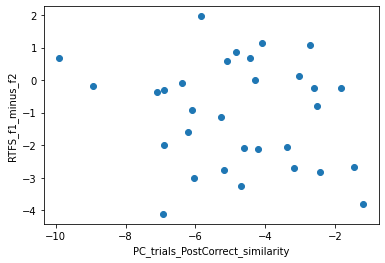

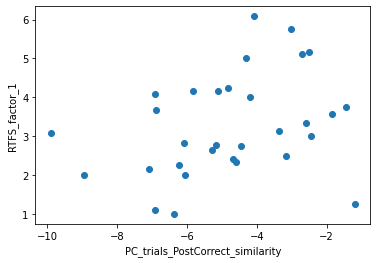

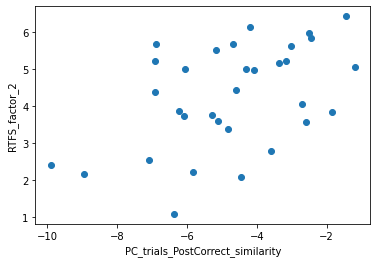

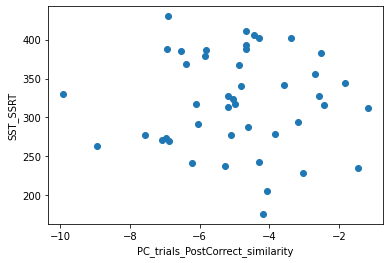

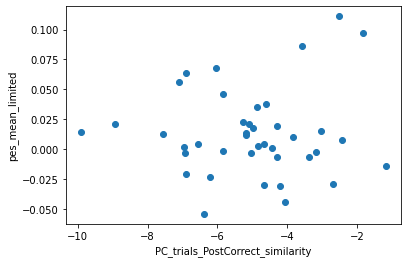

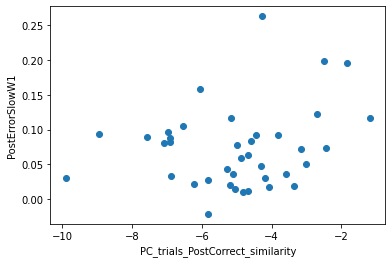

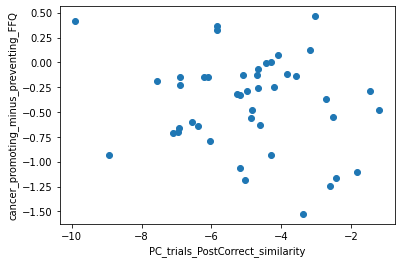

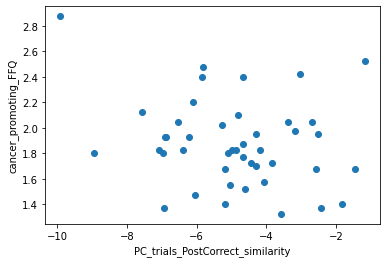

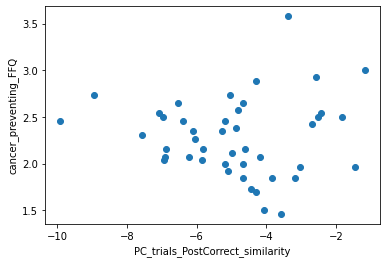

In [12]:
run_full_pes_analysis('wholebrain',None,'dot_product',include_gender_breakdown=True)

So it might make to focus on female only. just for comparison, how does this look if we try correlation as well as dot product.

These results are not...completely resistant to our p-hacking. we have checked a _lot_ of different items to get here. On the other hand, we were more interested in RTFS than anything else right from the start-this was kind of the hypothesis we were looking at. We have had degrees of freedom in outlier detection and RTFS measure (f1, f2, f2mf1) and the similarity measure that we used.

Still we have the full dataset to go check on; under half of the subjects are fully represented here.

In [13]:
def run_full_pes_analysis_no_male_specific(mask_label,mask_file,similarity_method):
    dataset_mask_label = mask_label
    relevant_mask = mask_file
    results_filepath=ml_data_folderpath + "/SST/train_test_results_" + dataset_name + "_84subs_twoclasses_" + dataset_mask_label +".pkl"
    brain_data_filepath = ml_data_folderpath + '/SST/Brain_Data_posterror_conditions_84subs_correct_cond.pkl'

    plotting.plot_img(
        relevant_mask,
        threshold='auto',
        cmap='autumn',
        bg_img=background_img)


    print(results_filepath)
    results=pickle.load(open(results_filepath,'rb'))

    print(np.mean(results[0]))

    PostCorrect_ns=results[3]['CorrectGoFollowingCorrectStop']
    #display(Markdown("### CorrectGoFollowingCorrectStop"))
    plotting.plot_img(PostCorrect_ns,threshold='auto',bg_img=background_img)

    PostError_ns=results[3]['CorrectGoFollowingFailedStop']
    #display(Markdown("### CorrectGoFollowingFailedStop"))
    plotting.plot_img(PostError_ns,threshold='auto',bg_img=background_img)

    print(results_filepath,flush=True)

    print("plotting signatures")

    plot_stat_maps(PostError_ns,PostCorrect_ns)

    print("loading data")

    bd=get_bd(brain_data_filepath,PostError_ns,PostCorrect_ns,relevant_mask,similarity_method=similarity_method)

    create_histogram(bd)

    ind_div_combined = get_ind_div_for_pes_combined(bd,ml_data_folderpath)

    ind_div_combined = remove_selected_outliers(ind_div_combined,show_plot=False)

    for neural_var in ['PE_trials_PostError_similarity','PC_trials_PostCorrect_similarity']:
        display(Markdown("### " + neural_var))
        for correlate in ['RTFS_f1_minus_f2','RTFS_factor_1','RTFS_factor_2','SST_SSRT','pes_mean_limited','PostErrorSlowW1','cancer_promoting_minus_preventing_FFQ',
            'cancer_promoting_FFQ','cancer_preventing_FFQ']:
            visualize_corr(neural_var,correlate,ind_div_combined)
            
    for bs_f in ['Female']:
        display(Markdown("### " + bs_f))
        for neural_var in ['PE_trials_PostError_similarity','PC_trials_PostCorrect_similarity']:
            display(Markdown("#### " + neural_var))
            for correlate in ['RTFS_f1_minus_f2','RTFS_factor_1','RTFS_factor_2','SST_SSRT','pes_mean_limited','PostErrorSlowW1','cancer_promoting_minus_preventing_FFQ',
        'cancer_promoting_FFQ','cancer_preventing_FFQ']:
                visualize_corr(neural_var,correlate,ind_div_combined.loc[ind_div_combined.birthsex_factor==bs_f,:])




## Correlation

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/train_test_results_posterror_conditions_84subs_twoclasses_wholebrain.pkl
0.8888888888888888
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/train_test_results_posterror_conditions_84subs_twoclasses_wholebrain.pkl
plotting signatures


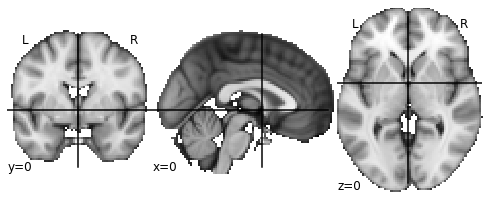

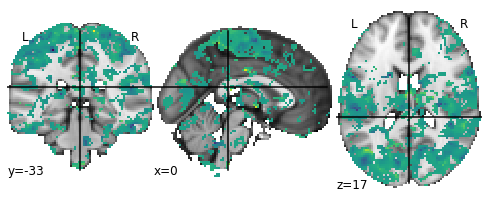

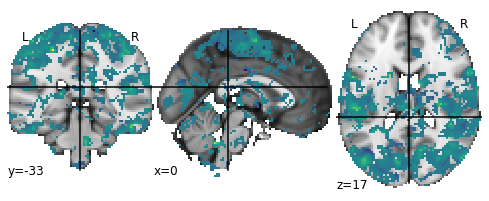

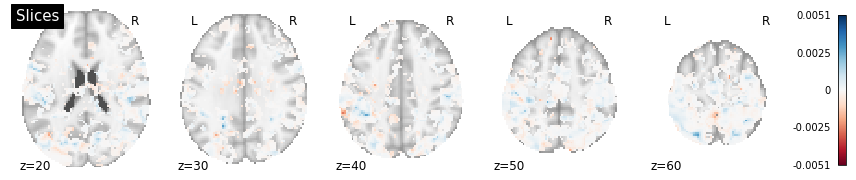

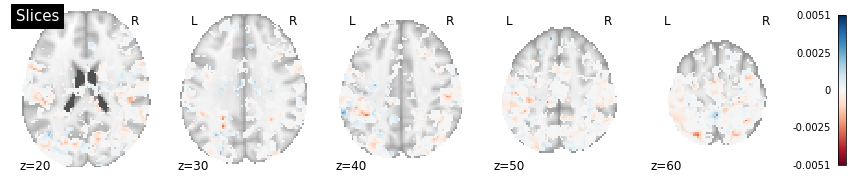

loading data
applying mask
getting similarity 1
getting similarity 2
creating histograms


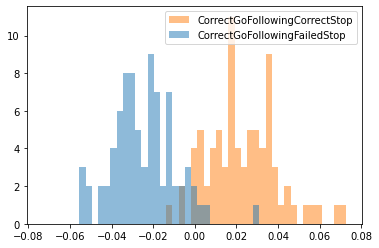

,PostError_similarity,PostCorrect_similarity
condition_label,,
CorrectGoFollowingCorrectStop,0.024332,-0.024332
CorrectGoFollowingFailedStop,-0.025168,0.025168


0.009232456815562565 0.07499674494725306 -0.0657642881316905 0.08422920176281562


0.04934769830378225 0.16000871055522017 -0.11066101225143793 0.20935640885900242


1200.7835177866666 4461.633046351562 -3260.849528564896 5662.416564138229


0.02176800794977803 0.05622265410602417 -0.034454646156246146 0.0779906620558022


-0.025926195985069376 0.044119636947643294 -0.07004583293271267 0.018193440962573918


-0.02176800794977803 0.05622265410602417 -0.0779906620558022 0.034454646156246146


0.025926195985069376 0.044119636947643294 -0.018193440962573918 0.07004583293271267


### PE_trials_PostError_similarity

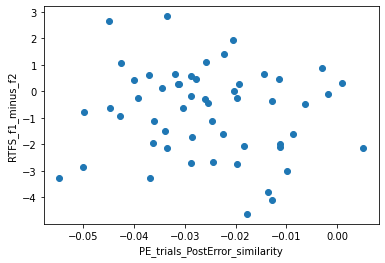

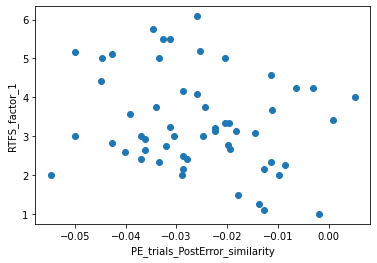

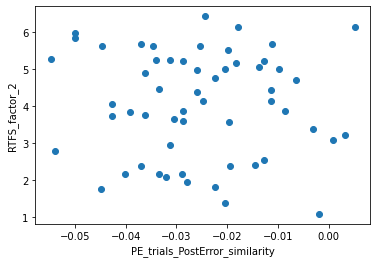

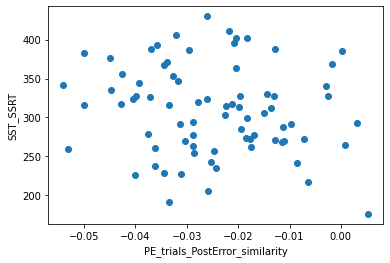

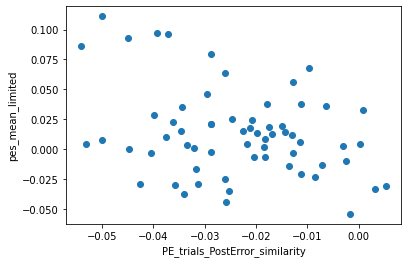

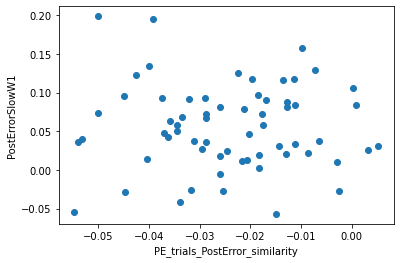

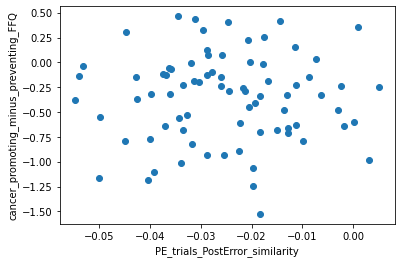

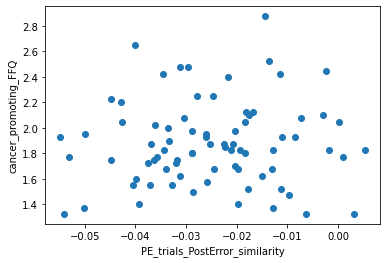

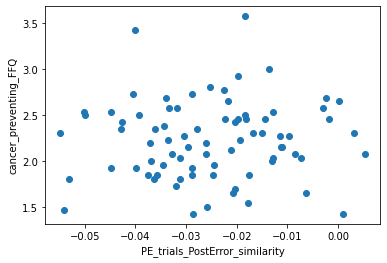

### PC_trials_PostCorrect_similarity

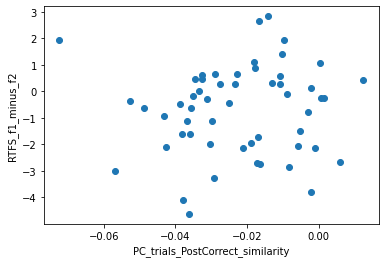

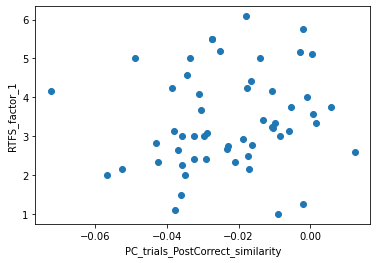

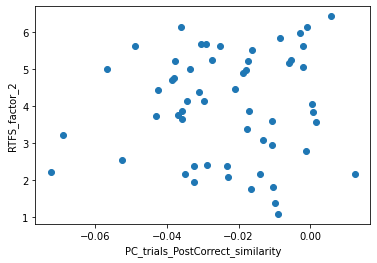

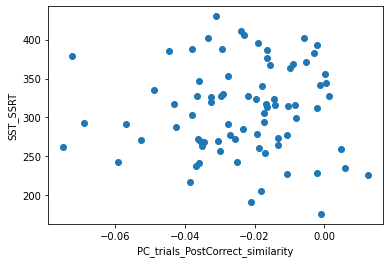

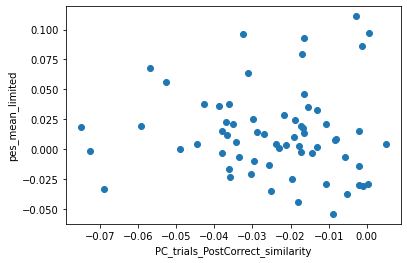

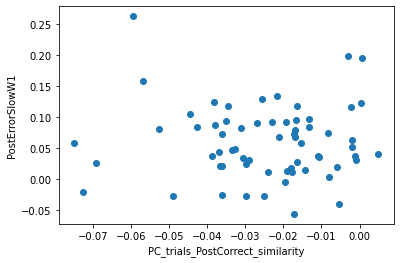

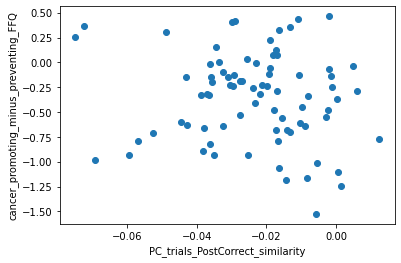

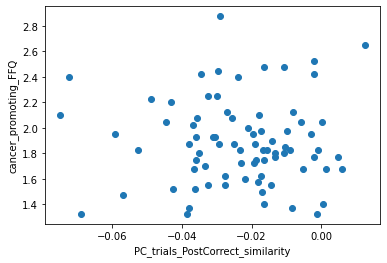

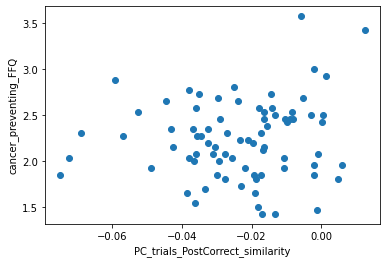

### Female

#### PE_trials_PostError_similarity

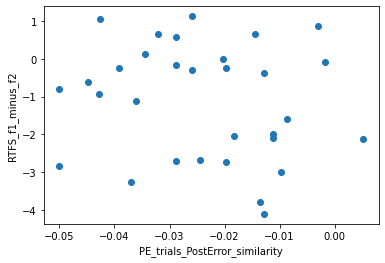

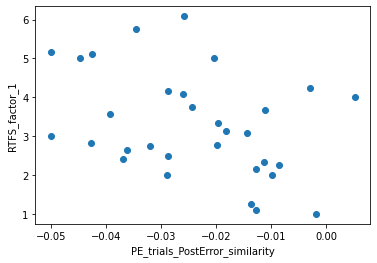

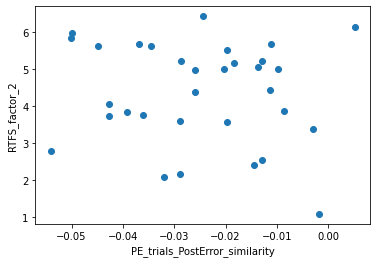

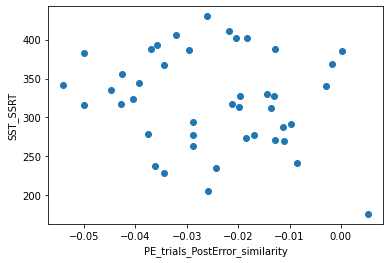

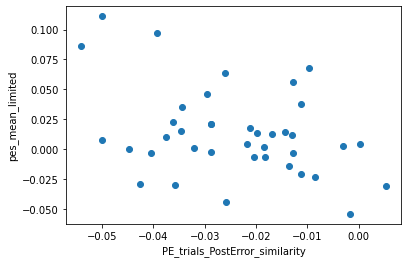

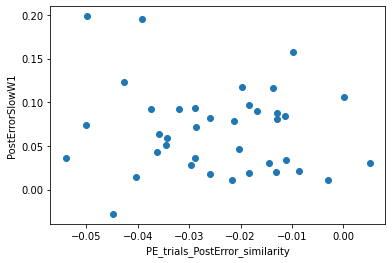

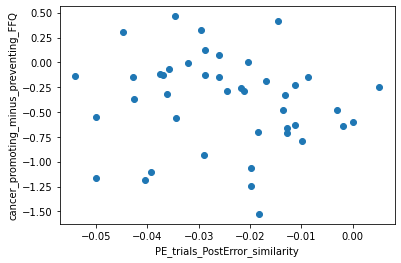

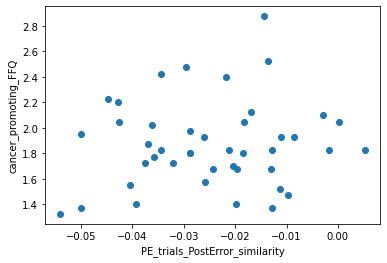

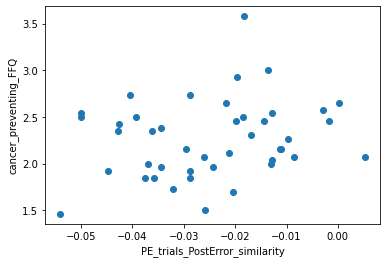

#### PC_trials_PostCorrect_similarity

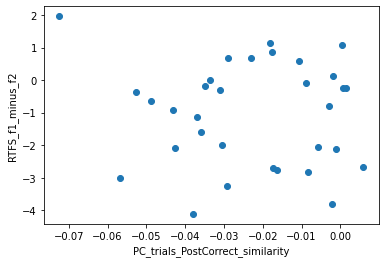

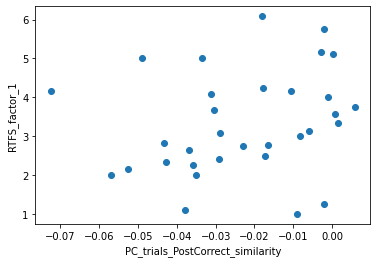

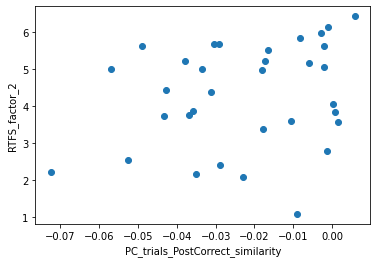

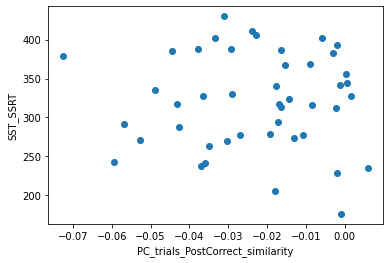

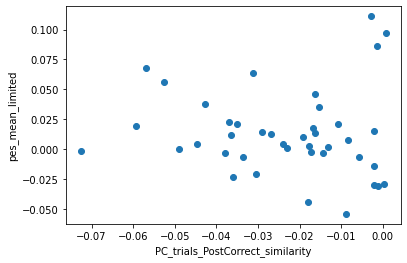

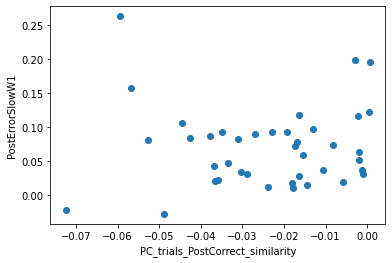

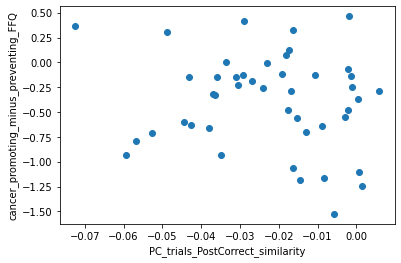

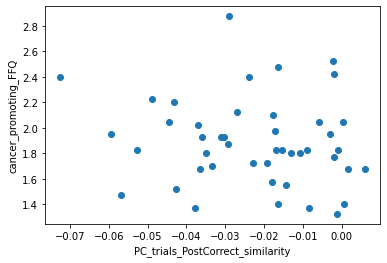

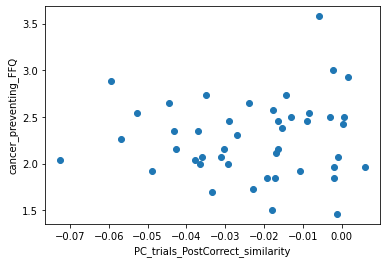

## cosine

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/train_test_results_posterror_conditions_84subs_twoclasses_wholebrain.pkl
0.8888888888888888
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/train_test_results_posterror_conditions_84subs_twoclasses_wholebrain.pkl
plotting signatures


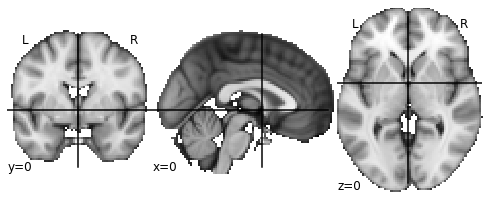

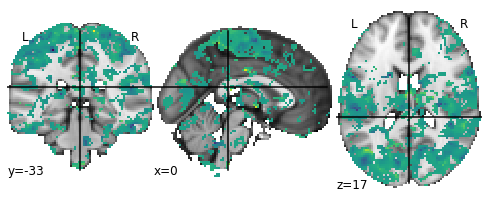

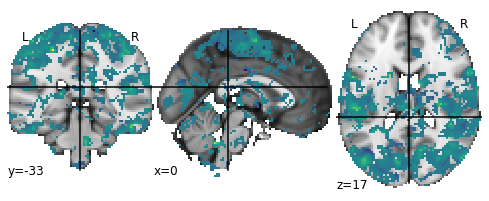

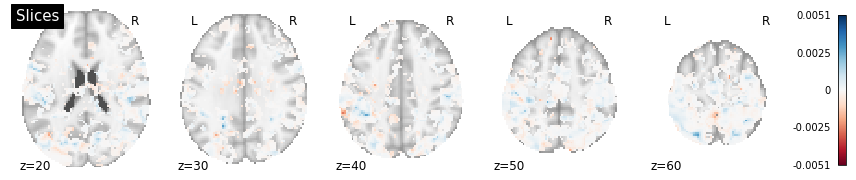

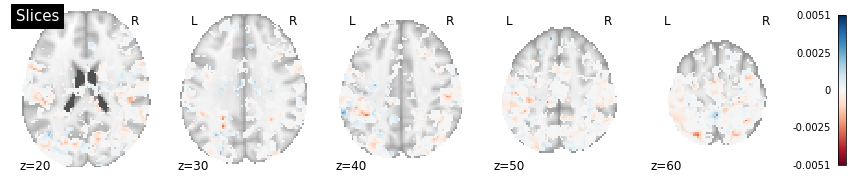

loading data
applying mask
getting similarity 1
getting similarity 2
creating histograms


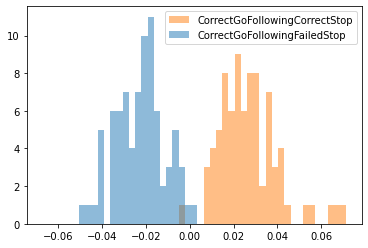

,PostError_similarity,PostCorrect_similarity
condition_label,,
CorrectGoFollowingCorrectStop,0.027660,-0.027660
CorrectGoFollowingFailedStop,-0.023124,0.023124


0.009232456815562565 0.07499674494725306 -0.0657642881316905 0.08422920176281562


0.04934769830378225 0.16000871055522017 -0.11066101225143793 0.20935640885900242


1200.7835177866666 4461.633046351562 -3260.849528564896 5662.416564138229


0.02535646848842646 0.04041018121352167 -0.01505371272509521 0.06576664970194812


-0.021238228550497368 0.03475461188461731 -0.055992840435114676 0.01351638333411994


-0.02535646848842646 0.04041018121352167 -0.06576664970194812 0.01505371272509521


0.021238228550497368 0.03475461188461731 -0.01351638333411994 0.055992840435114676


### PE_trials_PostError_similarity

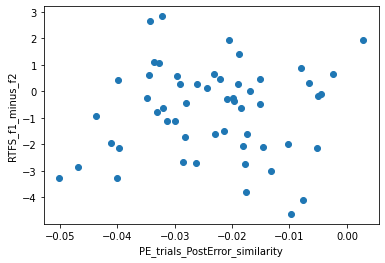

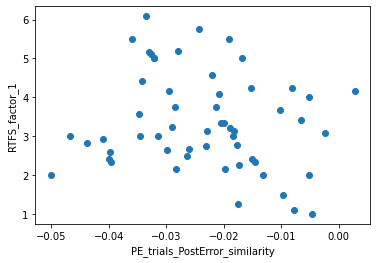

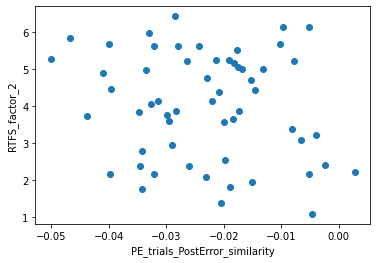

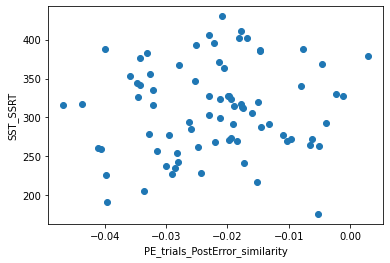

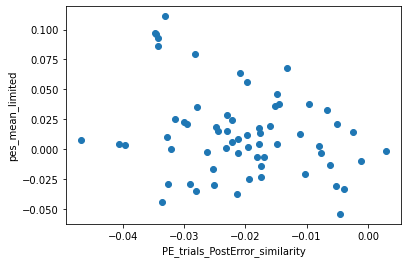

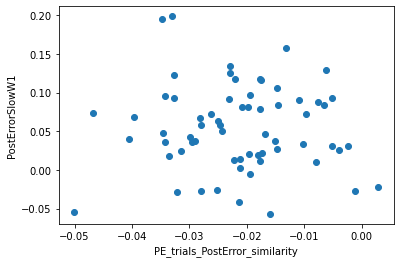

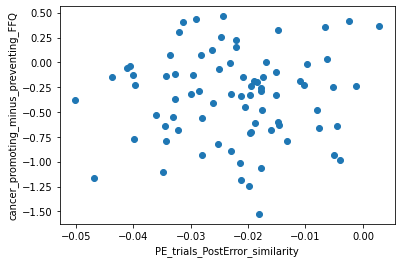

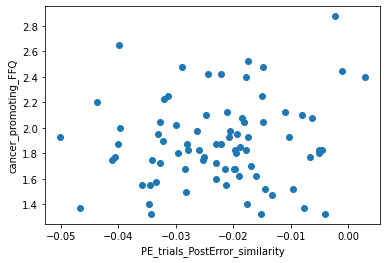

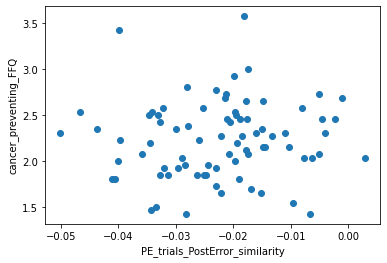

### PC_trials_PostCorrect_similarity

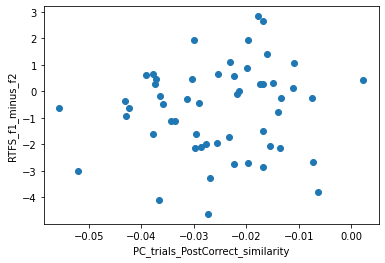

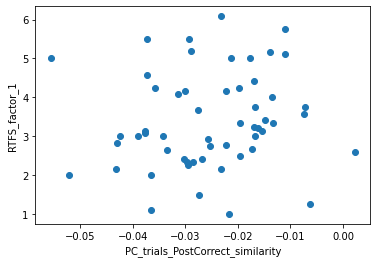

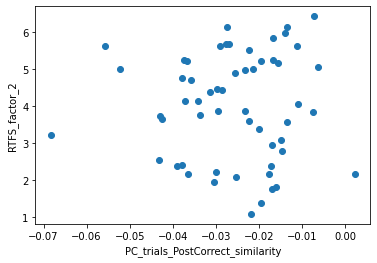

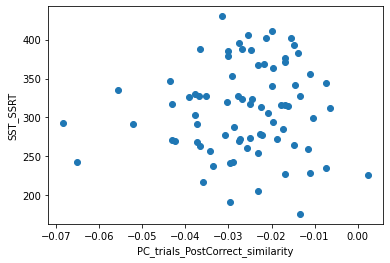

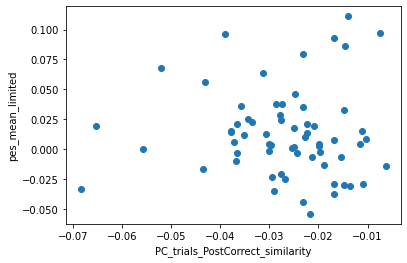

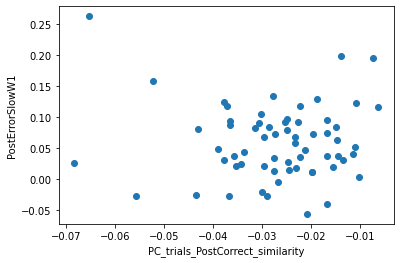

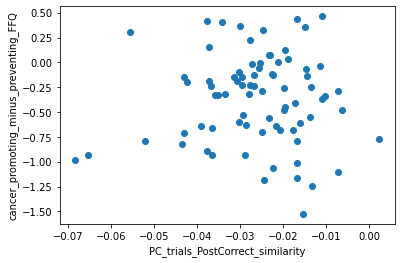

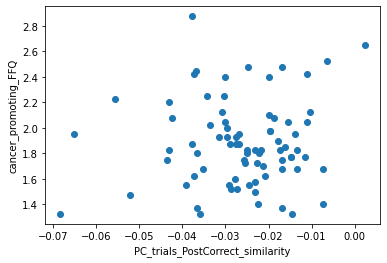

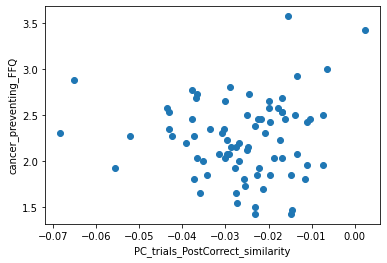

### Female

#### PE_trials_PostError_similarity

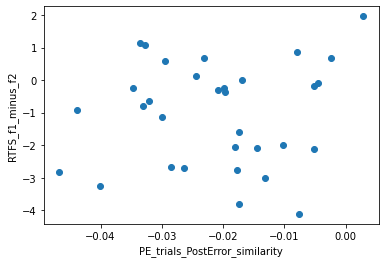

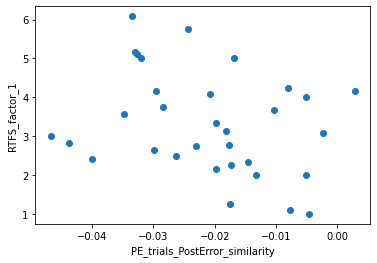

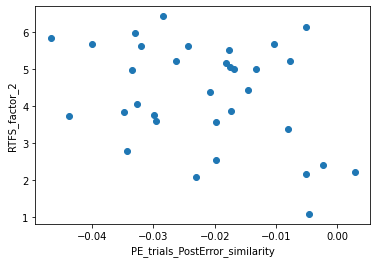

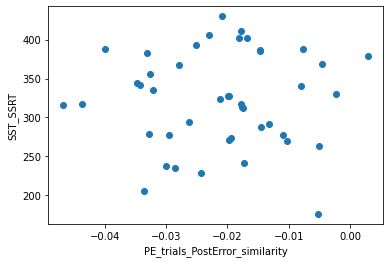

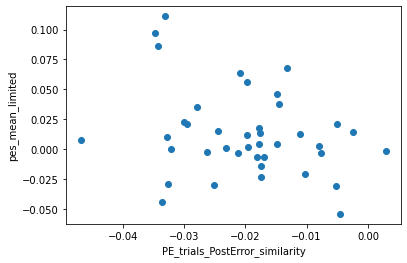

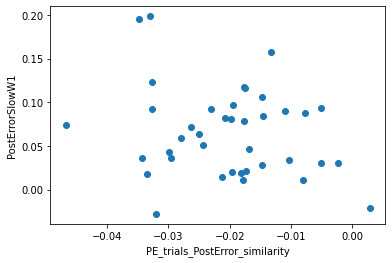

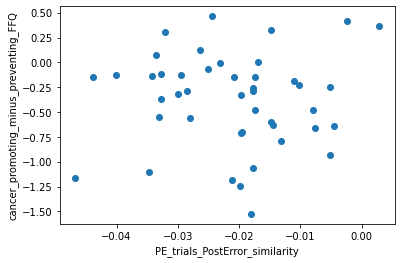

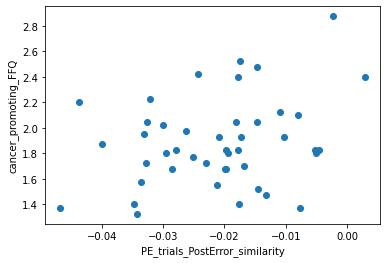

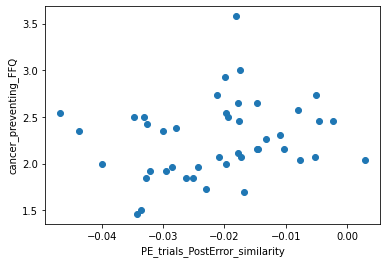

#### PC_trials_PostCorrect_similarity

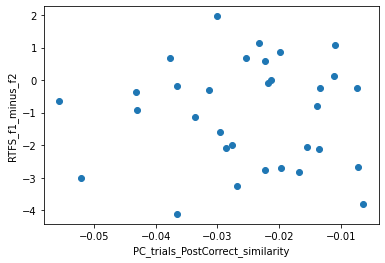

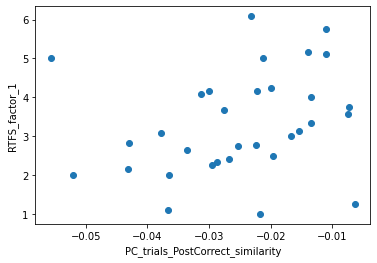

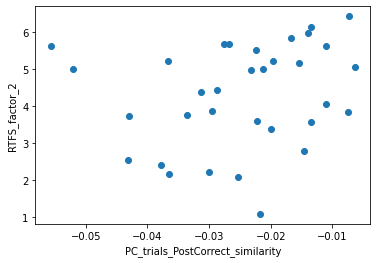

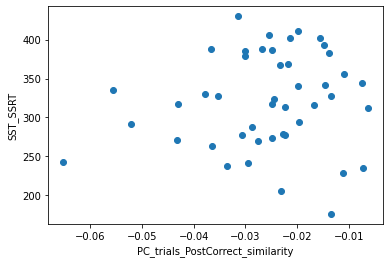

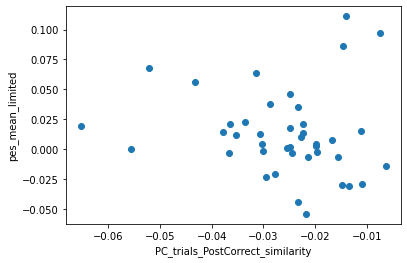

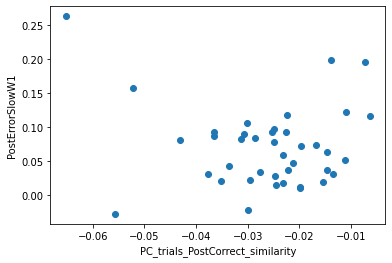

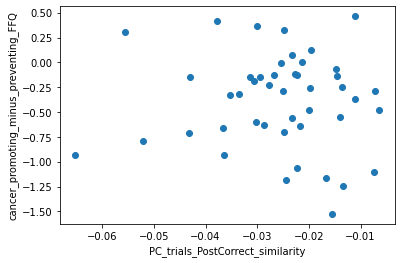

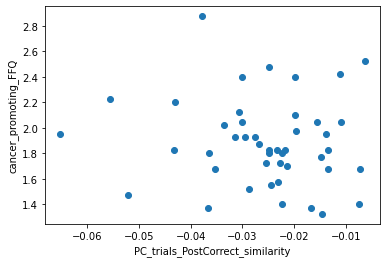

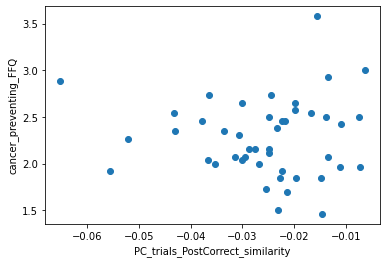

In [14]:
display(Markdown("## " + 'Correlation'))
run_full_pes_analysis_no_male_specific('wholebrain',None,'correlation')
display(Markdown("## " + 'cosine'))
run_full_pes_analysis_no_male_specific('wholebrain',None,'cosine')

## Comparing outlier measures

I don't love the 3SD measure. need to compare them specifically for whole-brain...

In [11]:
from analyze_results import outlier_detection_carling, outlier_detection_median_sd

def remove_selected_outliers(ind_div_combined,show_plot=False):
    for cname in ['pes_mean_limited','PostErrorSlowW1','IPAQ_MET_kCal','PC_trials_PostError_similarity','PE_trials_PostError_similarity',
                 'PC_trials_PostCorrect_similarity','PE_trials_PostCorrect_similarity']:
        display(HTML(cname))
        display(HTML('carling'))
        carling = outlier_detection_carling(ind_div_combined[cname],show_plot=show_plot)
        display(HTML('3sd'))
        sd_3 = outlier_detection_median_sd(ind_div_combined[cname],show_plot=show_plot)
        
        ind_div_combined[cname] = sd_3
    
    return(ind_div_combined)


def compare_outlier_measures(mask_label,mask_file,similarity_method):
    dataset_mask_label = mask_label
    relevant_mask = mask_file
    results_filepath=ml_data_folderpath + "/SST/train_test_results_" + dataset_name + "_84subs_twoclasses_" + dataset_mask_label +".pkl"
    brain_data_filepath = ml_data_folderpath + '/SST/Brain_Data_posterror_conditions_84subs_correct_cond.pkl'

    plotting.plot_img(
        relevant_mask,
        threshold='auto',
        cmap='autumn',
        bg_img=background_img)


    print(results_filepath)
    results=pickle.load(open(results_filepath,'rb'))

    print(np.mean(results[0]))

    PostCorrect_ns=results[3]['CorrectGoFollowingCorrectStop']
    #display(Markdown("### CorrectGoFollowingCorrectStop"))
    plotting.plot_img(PostCorrect_ns,threshold='auto',bg_img=background_img)

    PostError_ns=results[3]['CorrectGoFollowingFailedStop']
    #display(Markdown("### CorrectGoFollowingFailedStop"))
    plotting.plot_img(PostError_ns,threshold='auto',bg_img=background_img)

    print(results_filepath,flush=True)

    print("plotting signatures")

    plot_stat_maps(PostError_ns,PostCorrect_ns)

    print("loading data")

    bd=get_bd(brain_data_filepath,PostError_ns,PostCorrect_ns,relevant_mask,similarity_method=similarity_method)

    create_histogram(bd)

    ind_div_combined = get_ind_div_for_pes_combined(bd,ml_data_folderpath)

    ind_div_combined = remove_selected_outliers(ind_div_combined,show_plot=True)


/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/train_test_results_posterror_conditions_84subs_twoclasses_wholebrain.pkl
0.8888888888888888
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/train_test_results_posterror_conditions_84subs_twoclasses_wholebrain.pkl
plotting signatures


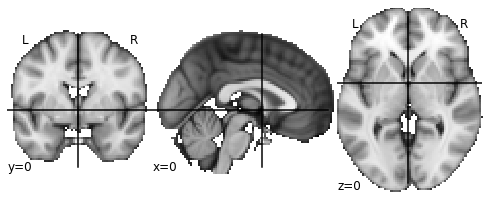

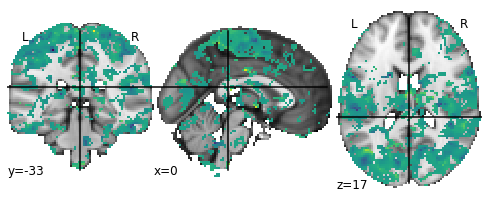

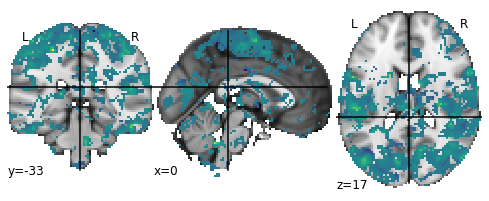

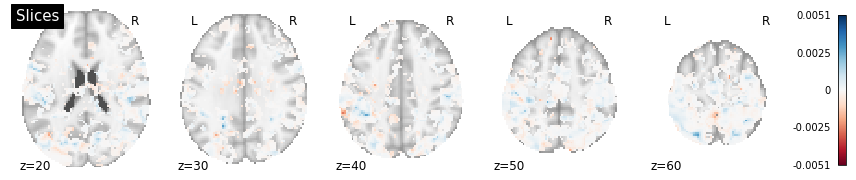

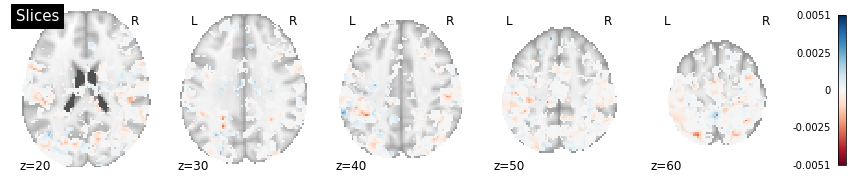

loading data
applying mask
getting similarity 1
getting similarity 2
creating histograms


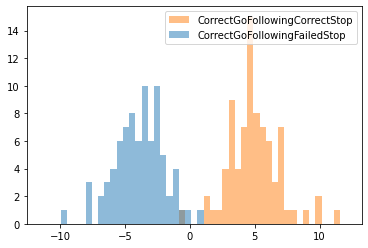

,PostError_similarity,PostCorrect_similarity
condition_label,,
CorrectGoFollowingCorrectStop,4.969145,-4.969145
CorrectGoFollowingFailedStop,-4.627246,4.627246


0.009232456815562565 0.07499674494725306 -0.0657642881316905 0.08422920176281562


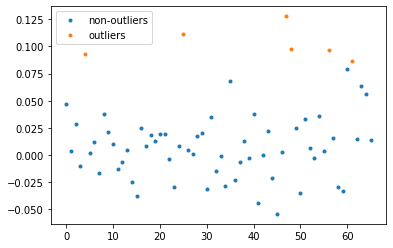

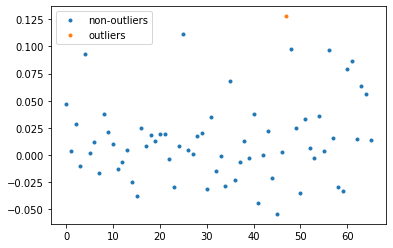

0.04934769830378225 0.16000871055522017 -0.11066101225143793 0.20935640885900242


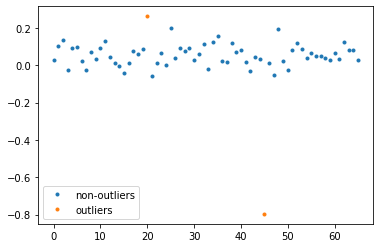

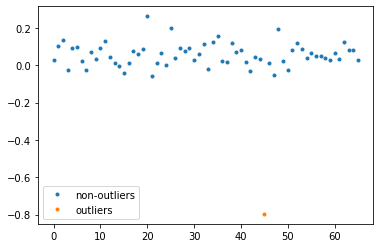

1200.7835177866666 4461.633046351562 -3260.849528564896 5662.416564138229


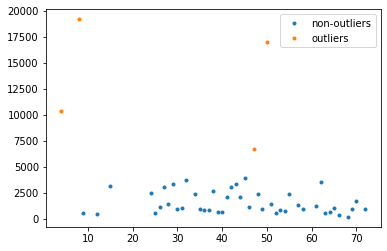

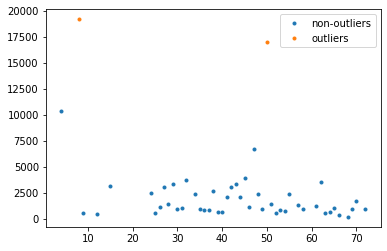

4.872617978045989 5.159237045882512 -0.286619067836523 10.0318550239285


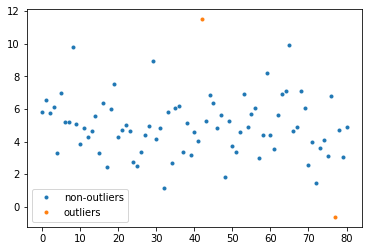

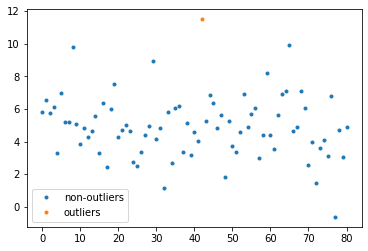

-3.8214337347524667 5.6639886574443405 -9.485422392196806 1.8425549226918738


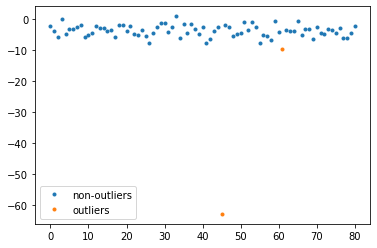

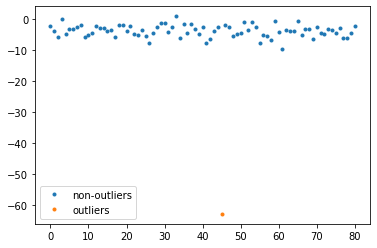

-4.872617978045989 5.159237045882512 -10.0318550239285 0.286619067836523


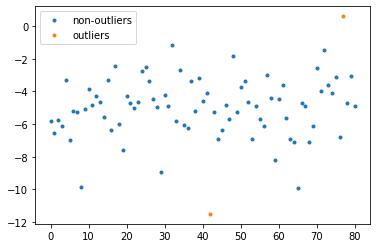

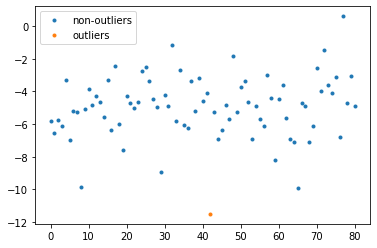

3.8214337347524667 5.6639886574443405 -1.8425549226918738 9.485422392196806


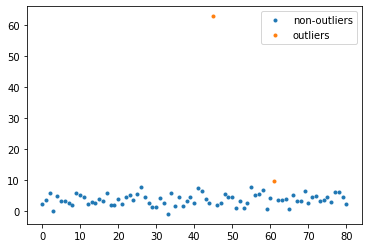

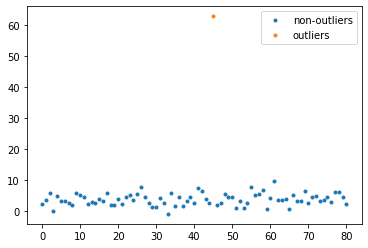

In [12]:
compare_outlier_measures('wholebrain',None,'dot_product')

Apart from IPAQ, 3SD does seem to be more appropriate here.

## Contrast

So...the next thing--let's just apply the contrast measure to whole-brain dot product.

We're going to use:

 - 3SD
 - male+female, female only measures
 - whole-brain

In [13]:
from analyze_results import plot_stat_maps

In [19]:
dataset_mask_label = 'wholebrain'
relevant_mask = None
results_filepath=ml_data_folderpath + "/SST/train_test_results_" + dataset_name + "_84subs_twoclasses_" + dataset_mask_label +".pkl"
brain_data_filepath = ml_data_folderpath + '/SST/Brain_Data_posterror_conditions_84subs_correct_cond.pkl'
brain_data_condition_contrast_filepath = ml_data_folderpath + '/SST/Brain_Data_posterror_conditions_84subs_condition_contrast.pkl'

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/train_test_results_posterror_conditions_84subs_twoclasses_wholebrain.pkl
0.8888888888888888


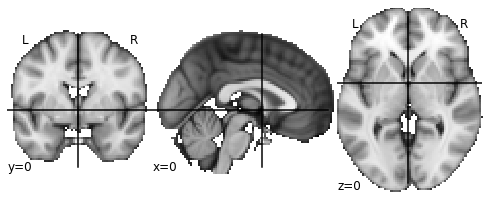

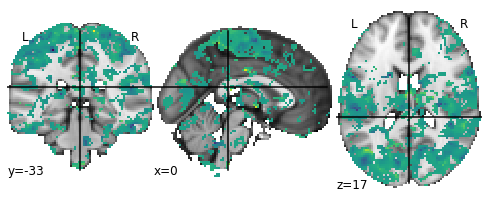

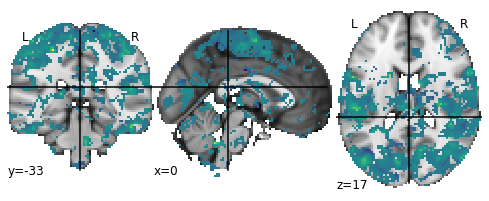

In [20]:
plotting.plot_img(
    relevant_mask,
    threshold='auto',
    cmap='autumn',
    bg_img=background_img)


print(results_filepath)
results=pickle.load(open(results_filepath,'rb'))

print(np.mean(results[0]))

PostCorrect_ns=results[3]['CorrectGoFollowingCorrectStop']
#display(Markdown("### CorrectGoFollowingCorrectStop"))
plotting.plot_img(PostCorrect_ns,threshold='auto',bg_img=background_img)

PostError_ns=results[3]['CorrectGoFollowingFailedStop']
#display(Markdown("### CorrectGoFollowingFailedStop"))
plotting.plot_img(PostError_ns,threshold='auto',bg_img=background_img)

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/train_test_results_posterror_conditions_84subs_twoclasses_wholebrain.pkl
plotting signatures


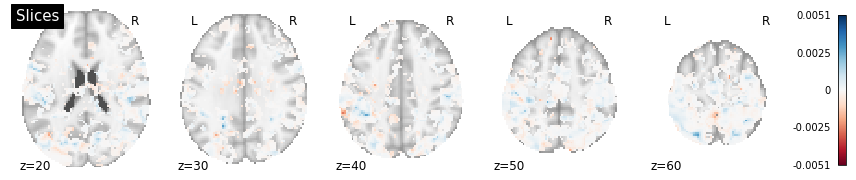

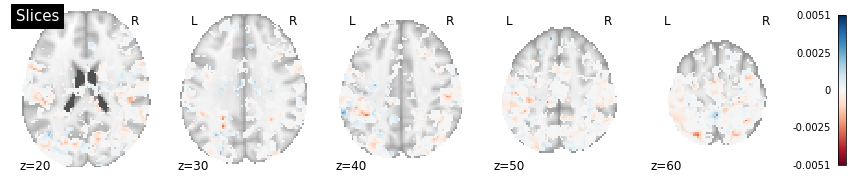

loading data
applying mask
getting similarity 1
getting similarity 2


In [18]:
print(results_filepath,flush=True)

print("plotting signatures")

plot_stat_maps(PostError_ns,PostCorrect_ns)

print("loading data")

bd=get_bd(brain_data_2_cond_filepath,PostError_ns,PostCorrect_ns,relevant_mask)



In [21]:
def create_condition_contrast(bd, condition_contrast_filepath,condition_0_label,condition_1_label):

    bd.X.reset_index(inplace=True,drop=True)

    bd_contrast = None
    for subject in np.unique(bd.X.subject):
        print(subject,end=", ")
        #get all the indices of images with this subject
        #ensure that we have exactly two images for this subject
        subj_indices = bd.X.index[bd.X.subject==subject]
        if len(subj_indices)!=2:
            raise Exception("should be precisely two images for each subject. there wasn't. look into this.")

        subject_bd = bd[subj_indices]
        condition_0_image = subject_bd[subject_bd.X.condition_label==condition_0_label]
        condition_1_image = subject_bd[subject_bd.X.condition_label==condition_1_label]

        subject_failed_stop_minus_correct_stop = condition_1_image - condition_0_image
        #remove items that aren't relevant for the contrast.
        subject_failed_stop_minus_correct_stop.X.drop(['condition_index','condition_label','raw_beta_description','beta'],axis=1,inplace=True)

        if bd_contrast is None:
            bd_contrast = subject_failed_stop_minus_correct_stop
        else:
            bd_contrast = bd_contrast.append(subject_failed_stop_minus_correct_stop)


    bd_contrast.X.reset_index(inplace=True,drop=True)
    
    with open(condition_contrast_filepath, 'wb') as handle:
        pickle.dump(bd_contrast,handle)
        
    return(bd_contrast)
    
bd_contrast = create_condition_contrast(bd, brain_data_condition_contrast_filepath, "CorrectGoFollowingCorrectStop","CorrectGoFollowingFailedStop")

DEV005, DEV006, DEV010, DEV011, DEV013, DEV014, DEV015, DEV016, DEV017, DEV018, DEV019, DEV020, DEV021, DEV022, DEV023, DEV024, DEV026, DEV027, DEV028, DEV029, DEV030, DEV034, DEV035, DEV036, DEV039, DEV040, DEV041, DEV042, DEV043, DEV046, DEV047, DEV048, DEV049, DEV050, DEV051, DEV052, DEV053, DEV055, DEV056, DEV057, DEV058, DEV059, DEV060, DEV062, DEV064, DEV067, DEV068, DEV069, DEV071, DEV073, DEV074, DEV076, DEV077, DEV079, DEV083, DEV084, DEV085, DEV086, DEV087, DEV089, DEV097, DEV105, DEV107, DEV135, DEV141, DEV145, DEV157, DEV158, DEV159, DEV164, DEV169, DEV171, DEV173, DEV177, DEV186, DEV197, DEV206, DEV215, DEV216, DEV217, DEV218, 

No handles with labels found to put in legend.


creating histograms


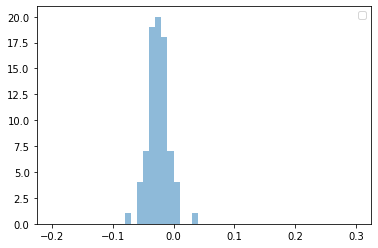

,0
PostError_similarity,-0.025168
PostCorrect_similarity,0.025168


In [22]:
from matplotlib import pyplot

print("creating histograms")
bins=np.linspace(-0.2,0.3,51) #create histogram bins
pyplot.hist(
    bd_contrast.X.PostError_similarity#.to_numpy()
    ,bins=bins
    ,alpha=0.5,histtype='stepfilled')
pyplot.legend(prop={'size': 10})
pyplot.show();


display(HTML(pd.DataFrame(bd_contrast.X.agg({
    'PostError_similarity':"mean",
    'PostCorrect_similarity':"mean"})).to_html()))

In [23]:
def get_ind_div_for_pes_combined_contrast(bd,ml_data_folderpath):

    pes_data = pd.read_csv(ml_data_folderpath + "/post_error_slowing.csv",index_col=0)
    pepc_contrast_data = pd.read_csv(ml_data_folderpath + "/post_error_slowing_simple_approach.csv",index_col=0)

    individual_differences = pd.read_csv(ml_data_folderpath + "/data_by_ppt.csv")
    individual_differences = individual_differences.rename(columns={'SID':'subject'})
    individual_differences['wave']=1
    #individual_differences['wave'] = individual_differences['wave'].astype(object) # for compatibility with the wave column in the dataset

    individual_differences = pd.merge(individual_differences,pes_data,how='outer',left_on='subject',right_on='subid')
    individual_differences = pd.merge(individual_differences,pepc_contrast_data,how='outer',left_on='subject',right_on='subid')

    subject_contrast_neural_performance = bd.X.loc[:,['subject','PostError_similarity','PostCorrect_similarity']]

    subject_contrast_neural_performance.columns = ['contrast_trials_' + col for col in subject_contrast_neural_performance.columns]
    subject_contrast_neural_performance =subject_contrast_neural_performance.rename(columns = {'contrast_trials_subject':'subject'})

    ind_div_combined = subject_contrast_neural_performance.merge(individual_differences,left_on='subject',right_on='subject',how='left')
    #ind_div_combined = remove_selected_outliers(ind_div_combined,show_plot=False)
    
    show_plot=True
    ind_div_combined['pes_mean_limited'] = outlier_detection_median_sd(ind_div_combined['pes_mean_limited'],show_plot=show_plot)
    ind_div_combined['PostErrorSlowW1'] = outlier_detection_median_sd(ind_div_combined['PostErrorSlowW1'],show_plot=show_plot)
    ind_div_combined['IPAQ_MET_kCal'] = outlier_detection_median_sd(ind_div_combined['IPAQ_MET_kCal'],show_plot=show_plot)
#    print(ind_div_combined.columns)
    ind_div_combined['contrast_trials_PostError_similarity'] = outlier_detection_median_sd(ind_div_combined['contrast_trials_PostError_similarity'],show_plot=show_plot)
    ind_div_combined['contrast_trials_PostCorrect_similarity'] = outlier_detection_median_sd(ind_div_combined['contrast_trials_PostCorrect_similarity'],show_plot=show_plot)
    
    return(ind_div_combined)


In [26]:
def remove_selected_outliers(ind_div_combined,show_plot=False):
    for cname in ['pes_mean_limited','PostErrorSlowW1','IPAQ_MET_kCal','contrast_trials_PostError_similarity','contrast_trials_PostCorrect_similarity']:
        display(HTML(cname))
        display(HTML('carling'))
        carling = outlier_detection_carling(ind_div_combined[cname],show_plot=show_plot)
        display(HTML('3sd'))
        sd_3 = outlier_detection_median_sd(ind_div_combined[cname],show_plot=show_plot)
        
        ind_div_combined[cname] = sd_3
    
    return(ind_div_combined)

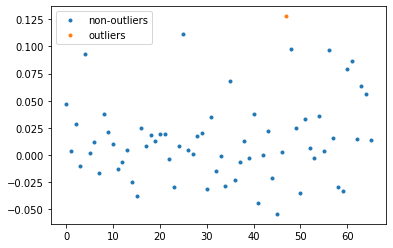

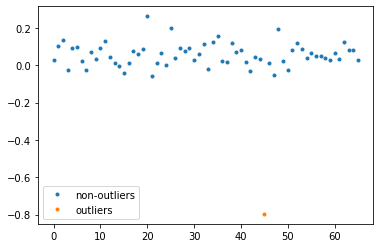

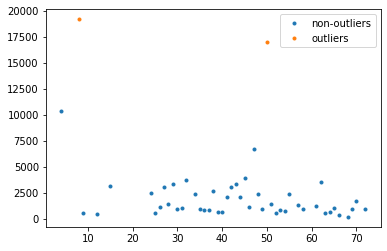

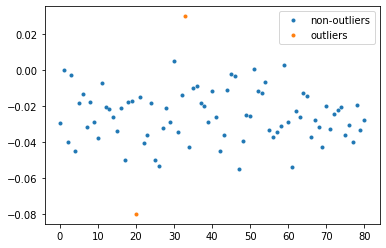

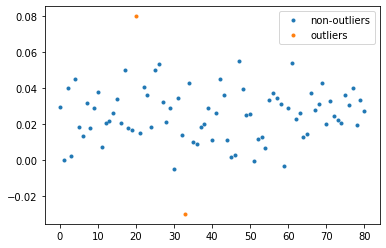

0.00828105466660063 0.07181663564867302 -0.06353558098207239 0.08009769031527365


0.050945566302562 0.16087340187831156 -0.10992783557574956 0.21181896818087356


1139.6801394666668 3508.7721695222954 -2369.0920300556286 4648.452308988963


-0.025926195985069376 0.0418519474284575 -0.06777814341352688 0.015925751443388123


0.025926195985069376 0.0418519474284575 -0.015925751443388123 0.06777814341352688


### contrast_trials_PostError_similarity

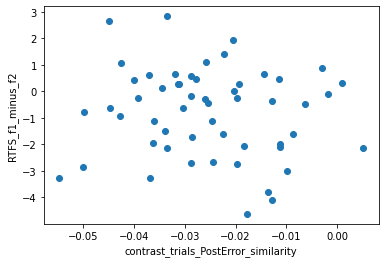

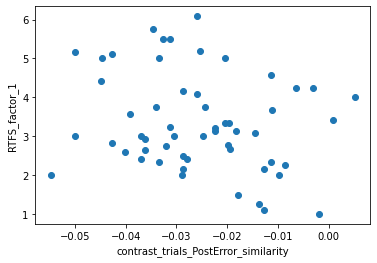

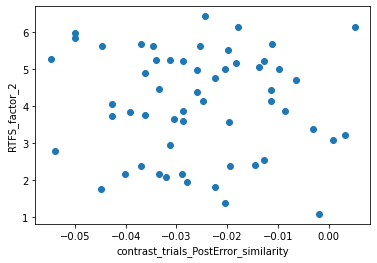

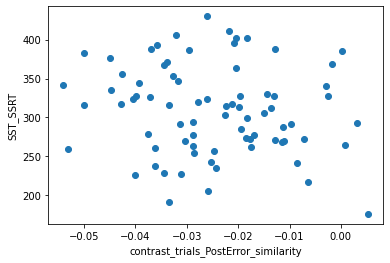

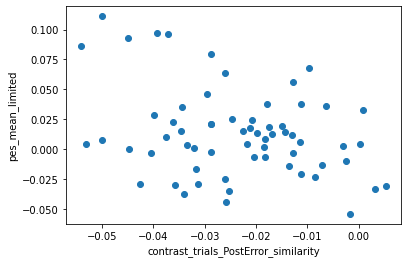

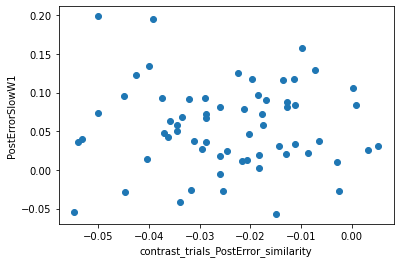

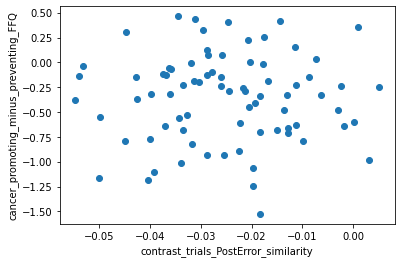

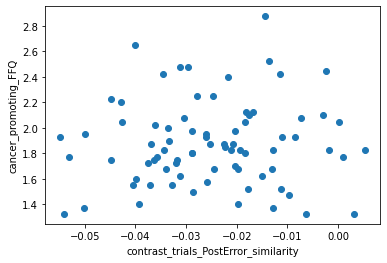

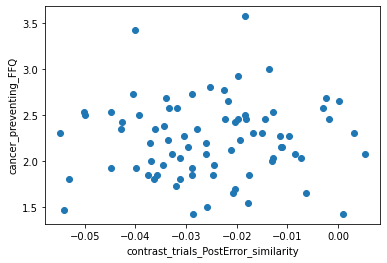

### contrast_trials_PostCorrect_similarity

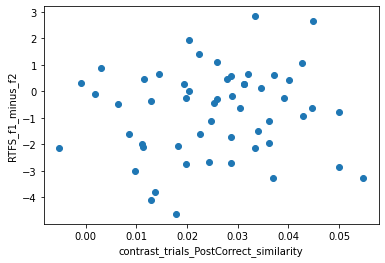

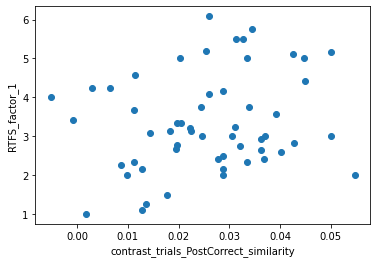

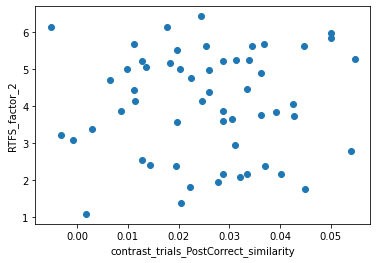

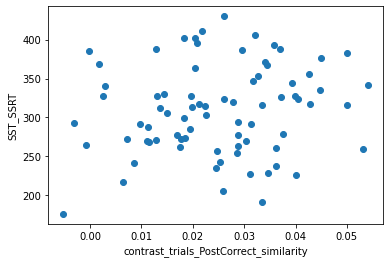

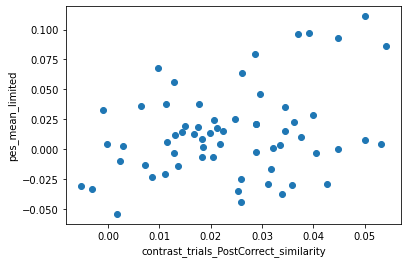

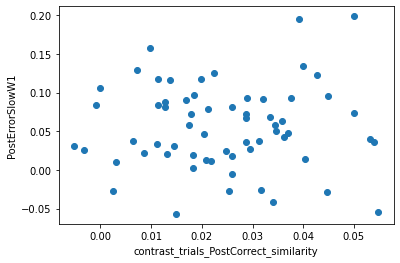

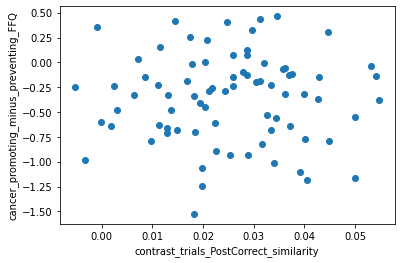

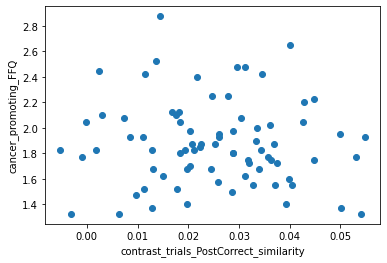

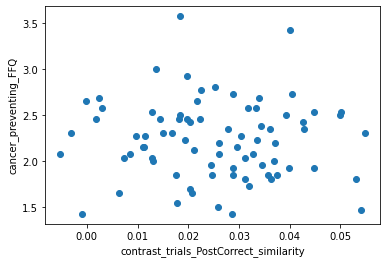

### Female

#### contrast_trials_PostError_similarity

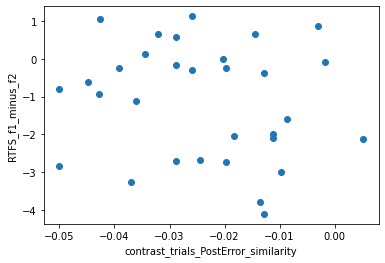

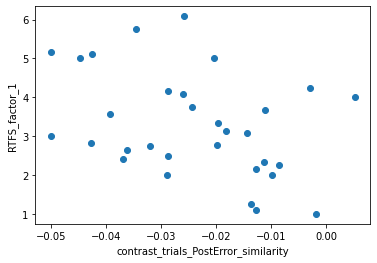

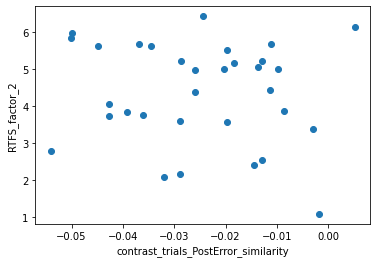

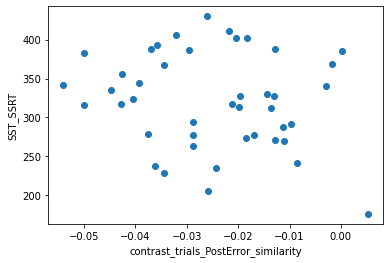

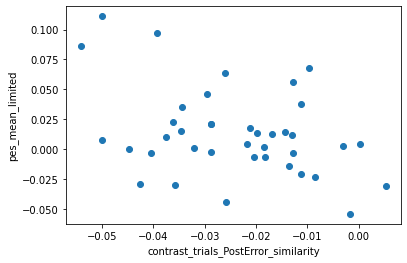

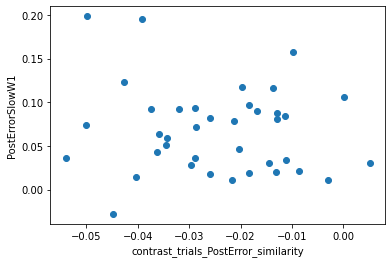

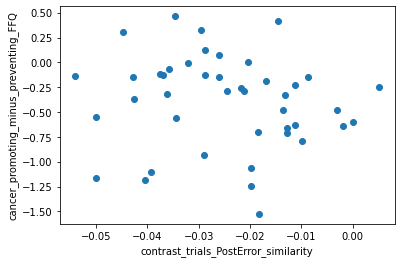

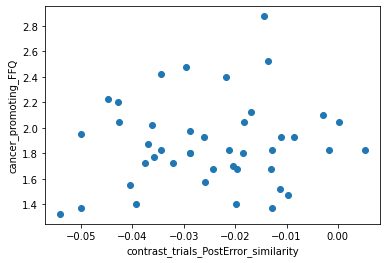

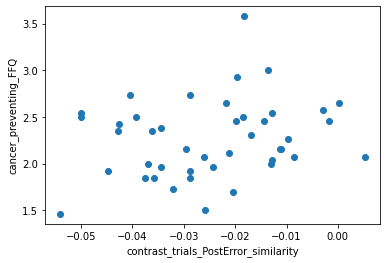

#### contrast_trials_PostCorrect_similarity

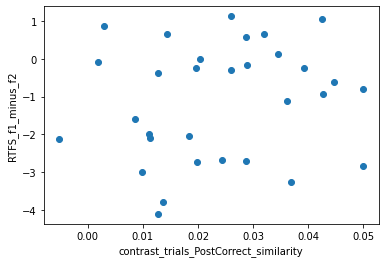

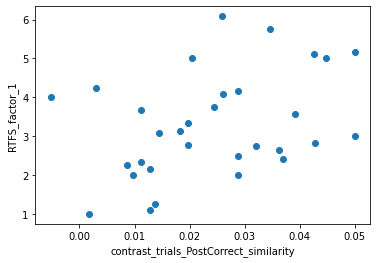

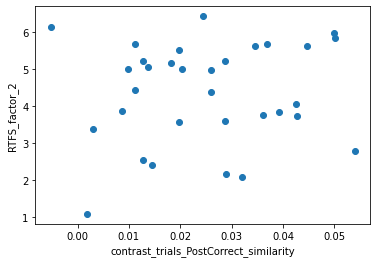

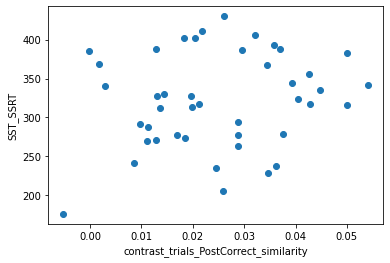

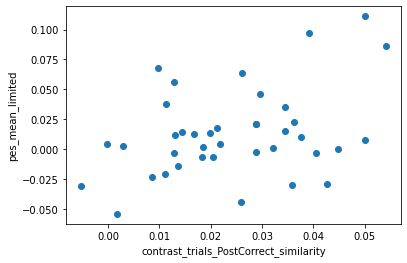

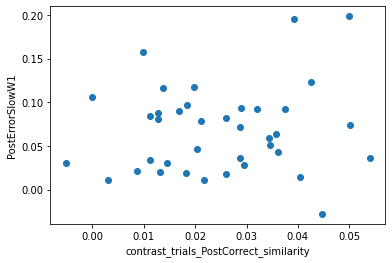

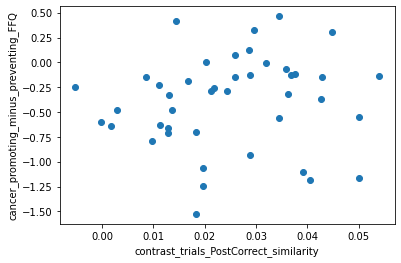

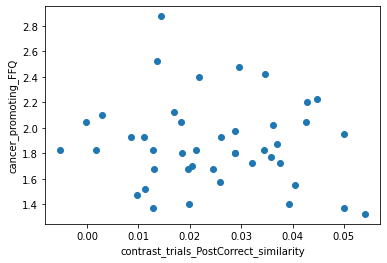

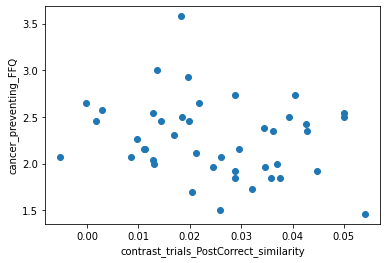

In [27]:
from nilearn import surface
from nilearn import datasets
from nilearn import plotting
from matplotlib import pyplot
from scipy.stats import pearsonr
import pickle
from IPython.core.display import display, HTML, Markdown
from nilearn import plotting
from nilearn.masking import compute_brain_mask
import nltools as nlt
import numpy as np
import pandas as pd

#create_histogram(bd_contrast)

ind_div_combined = get_ind_div_for_pes_combined_contrast(bd_contrast,ml_data_folderpath)

ind_div_combined = remove_selected_outliers(ind_div_combined,show_plot=False)

for neural_var in ['contrast_trials_PostError_similarity','contrast_trials_PostCorrect_similarity']:
    display(Markdown("### " + neural_var))
    for correlate in ['RTFS_f1_minus_f2','RTFS_factor_1','RTFS_factor_2','SST_SSRT','pes_mean_limited','PostErrorSlowW1','cancer_promoting_minus_preventing_FFQ',
        'cancer_promoting_FFQ','cancer_preventing_FFQ']:
        visualize_corr(neural_var,correlate,ind_div_combined)

for bs_f in ['Female']:
    display(Markdown("### " + bs_f))
    for neural_var in ['contrast_trials_PostError_similarity','contrast_trials_PostCorrect_similarity']:
        display(Markdown("#### " + neural_var))
        for correlate in ['RTFS_f1_minus_f2','RTFS_factor_1','RTFS_factor_2','SST_SSRT','pes_mean_limited','PostErrorSlowW1','cancer_promoting_minus_preventing_FFQ',
    'cancer_promoting_FFQ','cancer_preventing_FFQ']:
            visualize_corr(neural_var,correlate,ind_div_combined.loc[ind_div_combined.birthsex_factor==bs_f,:])


